In [73]:
from PIL import Image
import numpy as np
from datetime import datetime

In [425]:
class Picture:
    
    def __init__(self, width=1, height=1, color=[0,0,0]):
        """
        Initialisation. Takes 2 arguments: width and height.
        self.image - class from PIL;
        self.data - numpy array.
        """
        self.resolution = (height, width)
        self.data = np.full((height, width, 3), color, dtype=np.uint8)
        self.picture = Image.fromarray(self.data, 'RGB')
    
    def update_image(self):
        """
        Update picture from array, after changes.
        """
        self.picture = Image.fromarray(self.data, 'RGB')
    
    def show_image(self):
        """
        Show current state of the image
        """
        self.update_image()
        self.picture.show()
    
    def setPixel(self, x, y, color):
        """
        Insert pixel in (x, y) and setup the color.
        """
        self.data[x][y] = np.array(color, dtype=np.uint8)
    
    def setMultiplePixels(self, coords, color):
        """
        Draw Pixels in multiple coordinates.
        """
        for x,y in coords:
            self.setPixel(x, y, color)
    
    def draw_line(self, x1=0, y1=0, x2=0, y2=0, color=[255, 255, 255], out=True):
        """
        Bresenham's line.
        """
        if out: time = datetime.now()
         
        dx = x2 - x1
        dy = y2 - y1
        
        sign_x = 1 if dx>0 else -1 if dx<0 else 0
        sign_y = 1 if dy>0 else -1 if dy<0 else 0
        
        if dx < 0: dx = -dx
        if dy < 0: dy = -dy
        
        if dx > dy:
            pdx, pdy= sign_x, 0
            es, el = dy, dx
        else:
            pdx, pdy = 0, sign_y
            es, el = dx, dy
        
        x, y = x1, y1
        
        error, t = el/2, 0        
        
        self.setPixel(x, y, color)
        
        while t < el:
            error -= es
            if error < 0:
                error += el
                x += sign_x
                y += sign_y
            else:
                x += pdx
                y += pdy
            t += 1
            self.setPixel(x, y, color)
        
        if out: time = datetime.now() - time
        
        if out: print("Line from ({0}, {1}), to ({2}, {3}), with color = {4} in time: {5}".format(x1, y1, x2, y2, color, time))
        
        if out: self.update_image()
            
    def draw_straight_line(self, x1=0, y1=0, x2=0, y2=0, color=[255,255,255]):
        """
        For fast paint straight line.
        """        
        for y in range(y2,y1):
            self.setPixel(x1, y, color)
                
    def draw_circle(self, x0=0, y0=0, radius=0, color=[255, 255, 255], out = True):
        """
        Bresenham's circle.
        """
        
        if out: time = datetime.now()
        
        x, y, error = 0, radius, 0
        delta = 1 - 2*radius
        
        while(y >= 0):
            
            self.setMultiplePixels([(x0+x, y0+y), (x0+x, y0-y), (x0-x, y0+y), (x0-x, y0-y)], color)
            
            error = 2*(delta + y)-1
            
            if(delta < 0 and error <= 0):
                x += 1
                delta += 2 * x + 1
                continue
                
            error = 2 * (delta - x) -1
            
            if(delta>0 and error>0):
                y -= 1
                delta += 1 - 2 * y
                continue
                
            x += 1
            delta += 2 * (x - y)
            y -= 1
            
        if out: time = datetime.now() - time
        
        if out:
            print("Circle with center in ({0}, {1}) and radius = {2}, with color = {3} in time: {4}".format(x0, y0, radius, color, time))
        
        self.update_image()

    def draw_disc(self, x0=0, y0=0, radius=0, color=[255, 255, 255]):
        """
        If we need to fill a circle, we need to fill the lines from previous algorithm. 
        """
        time = datetime.now()
        
        x, y, error = 0, radius, 0
        delta = 1 - 2*radius
        
        while(y >= 0):
            
            self.draw_straight_line(x0+x, y0+y, x0+x, y0-y, color)
            self.draw_straight_line(x0-x, y0+y, x0-x, y0-y, color)
            
            error = 2*(delta + y)-1
            
            if(delta < 0 and error <= 0):
                x += 1
                delta += 2 * x + 1
                continue
                
            error = 2 * (delta - x) -1
            
            if(delta>0 and error>0):
                y -= 1
                delta += 1 - 2 * y
                continue
                
            x += 1
            delta += 2 * (x - y)
            y -= 1
        
        self.update_image
        time = datetime.now() - time    
        print("Disc with center in ({0}, {1}) and radius = {2}, with color = {3} in time: {4}".format(x0, y0, radius, color, time))
        
    def draw_square(self, x1=0, y1=0, x2=0, y2=0, color=[255,255,255]):
        """
        If we need to fill a circle, we need to create a circle 
        and paint new circles with decreased radius from start to 0. 
        """
        time = datetime.now()
        
        for x in range(x1, x2):
            self.draw_straight_line(x, y2, x, y1, color)
        
        self.update_image()
            
        time = datetime.now() - time    
        print("Drawed square from ({0}, {1}) to ({2}, {3}), with color = {4} in time: {5}".format(x1, y1, x2, y2, color, time))

Drawed square from (400, 0) to (500, 500), with color = [10, 255, 10] in time: 0:00:00.948284
Disc with center in (300, 300) and radius = 80, with color = [230, 30, 30] in time: 0:00:00.432244
Drawed square from (300, 220) to (382, 381), with color = [40, 100, 250] in time: 0:00:00.245605
Drawed square from (300, 280) to (400, 320), with color = [238, 211, 158] in time: 0:00:00.076885


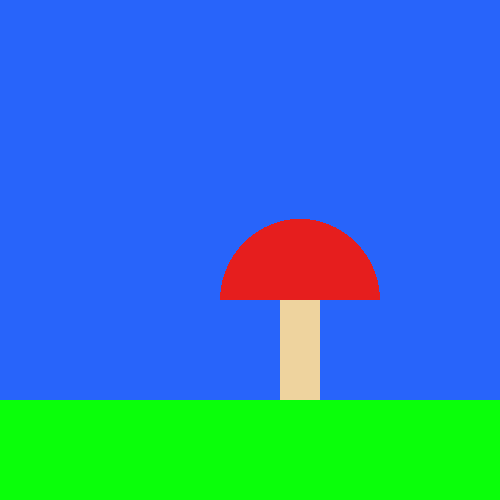

In [426]:
img = Picture(500, 500, [40,100,250])

img.draw_square(400, 0, 500, 500, [10,255,10])
img.draw_disc(300,300,80,[230,30,30])
img.draw_square(300, 220, 382, 381, [40,100,250])
img.draw_square(300, 280, 400, 320, [238,211,158])

img.picture